In [110]:
import sys
sys.path.insert(0, '/home/disk/p/jkcm/Code')
from Lagrangian_CSET import utils as cu
import matplotlib as mpl
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import utils
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
savefile = r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/all_with_div_shift_0.pickle'
df = pickle.load(open(savefile, 'rb'))
df['season'] = [['DJF','MAM','JJA','SON'][np.floor((i.month)%12/3).astype(int)] for i in df.datetime]
sep_df = df.loc[df['loc']=='SEP']
cset_df = df.loc[df['loc']=='NEP']

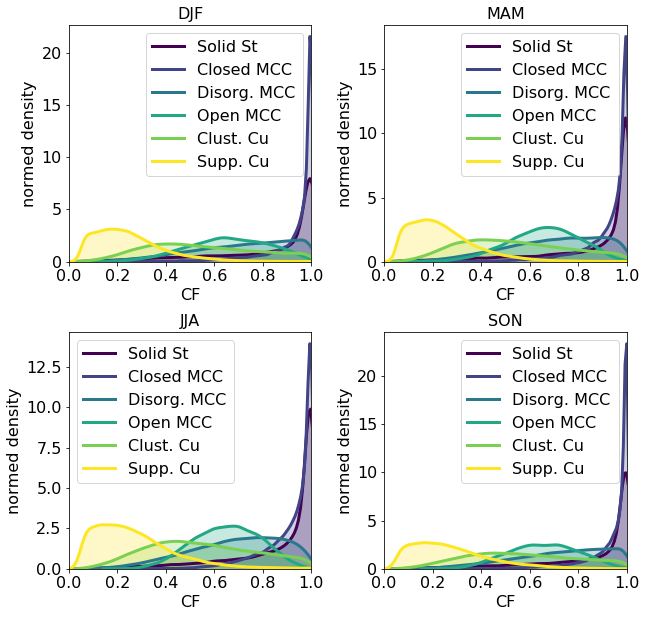

In [62]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
by_seas = sep_df.groupby('season') 
for axi, seas in zip([ax1, ax2, ax3, ax4], ['DJF','MAM','JJA','SON']):
    utils.plot_dataframe_by_cat(by_seas.get_group(seas), 'low_cf', scale_factor=1, xlims=(0,1) ,xlabel='CF',
                            ax=axi, savename=None, cert_thresh=None, verbose=False)
    axi.set_title(seas)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
# fig.savefig(f'/home/disk/p/jkcm/plots/measures/SEP_CF_bad.png')

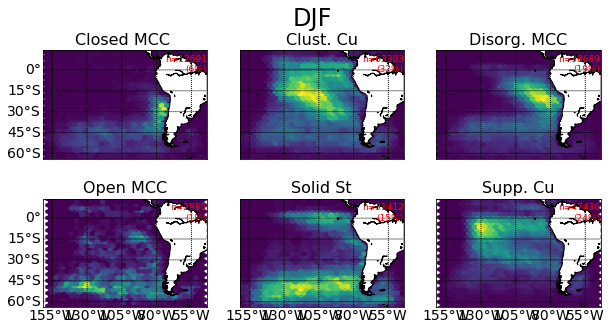

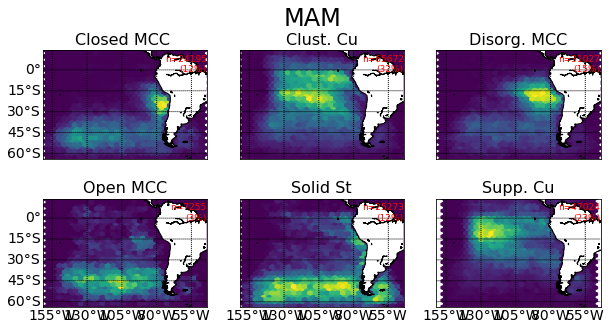

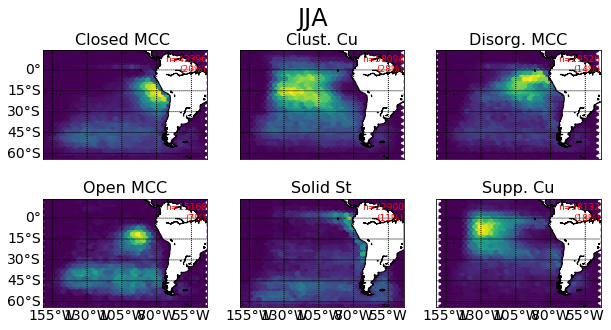

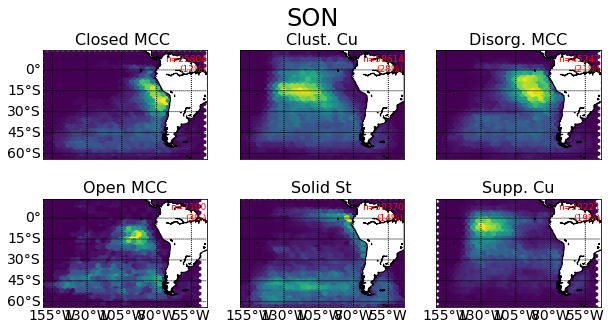

In [64]:
for seas in ['DJF','MAM','JJA','SON']:
    df_p = by_seas.get_group(seas)
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,5), sharex=True, sharey=True)
    axn = ax.flatten()
    grouped = df_p.groupby('cat')
    for cat, name  in utils.short_labels.items():
        df_sub = grouped.get_group(cat)
        llr = {'lat':(-64,14), 'lon':(198,316)}
        par_labs = [1, 0, 0, 0] if cat in [0, 3] else [0, 0, 0, 0]
        mer_labs = [0, 0, 0, 1] if cat in [3, 4, 5] else [0, 0, 0, 0]
        b = cu.bmap(ax=axn[cat], llr=llr, par_labs=par_labs, mer_labs=mer_labs, merspace=25)
        b.hexbin(df_sub['lon'], df_sub['lat'], gridsize=30)
        nstr = f"n={sum(df_sub['cat']==cat)}\n({int(sum(df_sub['cat']==cat)*100/len(df_p))}%)"
        axn[cat].set_title(name)
        axn[cat].annotate(nstr, xy=(1, 0.8), xycoords='axes fraction', fontsize=9, c='r', ha='right')
    plt.suptitle(seas)
#     fig.savefig(f'/home/disk/p/jkcm/plots/measures/maps/SEP_map_{seas}_bad.png')

Text(0.5, 0.98, 'SON')

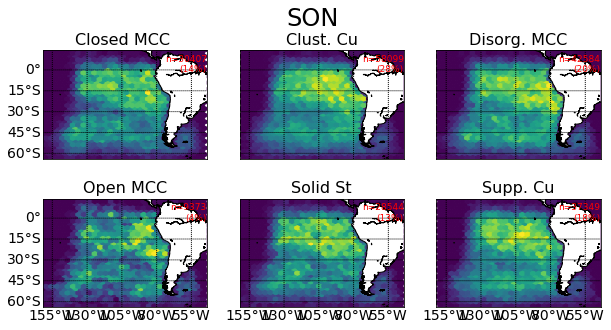

In [52]:
file_1 = r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/unified_table_SEP_2015.csv'
import datetime as dt

In [58]:
data = pd.read_csv(file_1)
data['datetime'] = [dt.datetime.strptime(i, '%Y-%m-%d %H:%M:%S') for i in data['date']]
data['season'] = [['DJF','MAM','JJA','SON'][np.floor((i.month)%12/3).astype(int)] for i in data.datetime]
win_df = data[data.season == 'JJA']

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f54ed0f7940>)

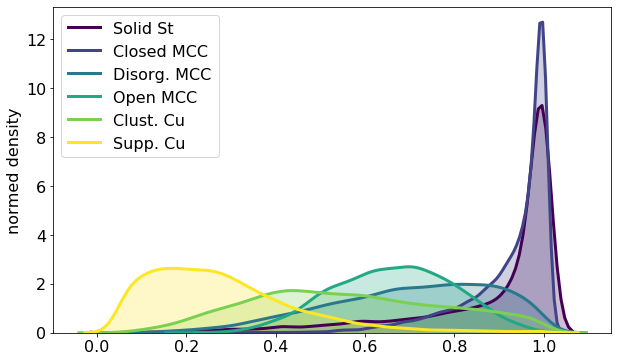

In [59]:
utils.plot_dataframe_by_cat(win_df, varname='low_cf')

In [87]:
dfn = df.iloc[0:10]
from process_divergence import applyParallel, applyPartial

In [93]:
def randfun(df, i):
    df[f'newlon_{i}'] = df['lon']+i
    return df

In [96]:
    by_day = dfn.groupby('cat')
    new_df = applyPartial(dfGrouped=by_day, func=randfun, args={'i': -3})

In [97]:
new_df

,cat,cert,date,high_cf,i,j,lat,loc,lon,low_cf,...,year,datetime,granule,day,locyear,season,ascat_div,ascat_div_std,ascat_time_offset,newlon_-3
0,1.0,0.992219,2014-01-01 19:00:00,0.000000,0,128,-47.555672,SEP,278.445862,0.628214,...,2014.0,2014-01-01 19:00:00,MYD021KM.A2014001.1900,2014-01-01,SEP_2014,DJF,1.076740e-05,0.000018,-4.64375,275.445862
1,1.0,0.994709,2014-01-01 19:00:00,0.000000,0,256,-47.322845,SEP,281.215958,0.526418,...,2014.0,2014-01-01 19:00:00,MYD021KM.A2014001.1900,2014-01-01,SEP_2014,DJF,1.035035e-05,0.000012,-5.60000,278.215958
3,1.0,0.746200,2014-01-01 19:00:00,0.000000,128,128,-48.681293,SEP,278.699150,0.749777,...,2014.0,2014-01-01 19:00:00,MYD021KM.A2014001.1900,2014-01-01,SEP_2014,DJF,-4.318895e-06,0.000021,-5.60000,275.699150
7,1.0,0.999099,2014-01-01 19:00:00,0.000000,256,256,-49.576843,SEP,281.860130,0.654959,...,2014.0,2014-01-01 19:00:00,MYD021KM.A2014001.1900,2014-01-01,SEP_2014,DJF,1.075345e-05,0.000031,-5.60000,278.860130
9,1.0,0.999519,2014-01-01 19:00:00,0.000000,384,128,-50.967663,SEP,279.223679,0.653585,...,2014.0,2014-01-01 19:00:00,MYD021KM.A2014001.1900,2014-01-01,SEP_2014,DJF,1.140079e-05,0.000019,-5.60000,276.223679
6,2.0,0.974770,2014-01-01 19:00:00,0.000000,256,128,-49.807373,SEP,278.959641,0.653239,...,2014.0,2014-01-01 19:00:00,MYD021KM.A2014001.1900,2014-01-01,SEP_2014,DJF,5.247191e-06,0.000022,-5.60000,275.959641
2,3.0,0.999952,2014-01-01 19:00:00,0.000000,0,384,-47.097878,SEP,283.340210,0.552630,...,2014.0,2014-01-01 19:00:00,MYD021KM.A2014001.1900,2014-01-01,SEP_2014,DJF,6.269870e-06,0.000016,-5.60000,280.340210
4,3.0,0.637543,2014-01-01 19:00:00,0.000000,128,256,-48.449738,SEP,281.532928,0.608894,...,2014.0,2014-01-01 19:00:00,MYD021KM.A2014001.1900,2014-01-01,SEP_2014,DJF,5.831763e-07,0.000018,-5.60000,278.532928
5,3.0,0.999994,2014-01-01 19:00:00,0.000122,128,384,-48.223141,SEP,283.704552,0.652353,...,2014.0,2014-01-01 19:00:00,MYD021KM.A2014001.1900,2014-01-01,SEP_2014,DJF,-3.005576e-06,0.000026,-5.60000,280.704552
8,3.0,0.999983,2014-01-01 19:00:00,0.000549,256,384,-49.348312,SEP,284.082253,0.714860,...,2014.0,2014-01-01 19:00:00,MYD021KM.A2014001.1900,2014-01-01,SEP_2014,DJF,-7.032985e-06,0.000017,-5.60000,281.082253


In [99]:
    class_df = utils.load_class_data('all')


In [106]:
max(class_df.date)

'2016-12-31 22:35:00'